# ６章　データの分類2：教師あり機械学習
-----

## 6-1. 利用データ
データセット ：iris  
FisherとAndersonによるアヤメ分類のデータセット(Rに組み込まれている)  
  
Species : setosa, versicolor, virginicaの3種類  
Sepal : 「がく片」の長さと幅  
Petal : 「花弁」の長さと幅  
データ数：150 (3種のデータが50個ずつ)

## 6-2. サポートベクターマシーン
サポートベクターマシーン : Support Vector Machine (SVM)  
SVMは教師あり機械学習の一つであり、判別分析や回帰分析に利用  
SVMは正規分布やロジスティック分布といった仮定が必要ない  
SVMはデータ間のギャップであるマージンが最大化になるように分類  
  
パーセプトロン(perceptron) -> 線形分離可能(直線で分けられる)  
SVM -> 非線形分離可能  
  
目的変数によって、Rで自動判別される  
目的変数がカテゴリ型（factor型） -> 分類  
目的変数が数値型（numeric型：連続値）-> 回帰  
※講座では分類を実施  
    
サポートベクターマシーンライブラリのインストール  
terminalで実施  
install.packages("kernlab")
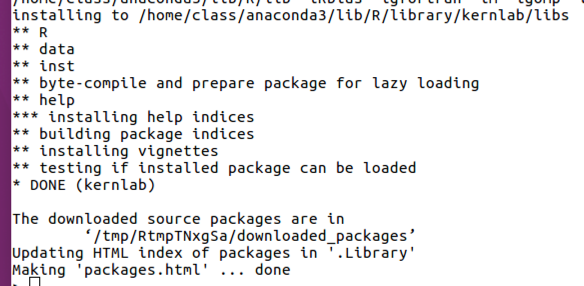

学習データとテストデータの作成  
150件から120件を学習データ、30件をテストデータとする

In [1]:
#ライブラリの読み込み
library(kernlab)
#irisデータから120件のデータを学習に利用
#乱数を固定
set.seed(123)
#150からランダムに120個の数値を選択
index <- sample(1:150,120)
#1indexから学習データを作成
train.data <-iris[index,]
head(train.data)
# 学習データ以外をテストデータとして作成
test.data <- iris[-index,]
head(test.data)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
44,5.0,3.5,1.6,0.6,setosa
118,7.7,3.8,6.7,2.2,virginica
61,5.0,2.0,3.5,1.0,versicolor
130,7.2,3.0,5.8,1.6,virginica
138,6.4,3.1,5.5,1.8,virginica
7,4.6,3.4,1.4,0.3,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
2,4.9,3.0,1.4,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa
21,5.4,3.4,1.7,0.2,setosa
22,5.1,3.7,1.5,0.4,setosa
31,4.8,3.1,1.6,0.2,setosa


In [2]:
#学習を実施
iris.train <- ksvm(Species ~ ., data = train.data, kernel = "vanilladot")
iris.train

 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Linear (vanilla) kernel function. 

Number of Support Vectors : 26 

Objective Function Value : -0.5784 -0.2576 -16.4519 
Training error : 0.033333 

In [3]:
#テストを実施
iris.test <- predict(iris.train, test.data)
table(iris[-index,]$Species, iris.test)

            iris.test
             setosa versicolor virginica
  setosa          8          0         0
  versicolor      0          9         0
  virginica       0          0        13

## 6-3. ニューラルネットワーク
学習データとテストデータは前節のものを利用  
ニューラルネットワークのライブラリを取り込みと学習

In [4]:
#ニューラルネットワークのライブラリを取り込む
library(nnet)
#学習実施
iris.nn.train <- nnet(Species  ~.,data = train.data, size = 3)

# weights:  27
initial  value 169.363425 
iter  10 value 58.540139
iter  20 value 8.477622
iter  30 value 5.803355
iter  40 value 4.536998
iter  50 value 4.010762
iter  60 value 3.863421
iter  70 value 3.863107
iter  80 value 3.862108
final  value 3.862065 
converged


In [5]:
#テストを実施
iris.nn.test <- predict(iris.nn.train, test.data, type = "class")
table(iris[-index,]$Species, iris.nn.test)

            iris.nn.test
             setosa versicolor virginica
  setosa          8          0         0
  versicolor      0          9         0
  virginica       0          1        12

ネットワークを可視化  
NeuralNetToolsをインストール  
install.packages("NeuralNetTools")
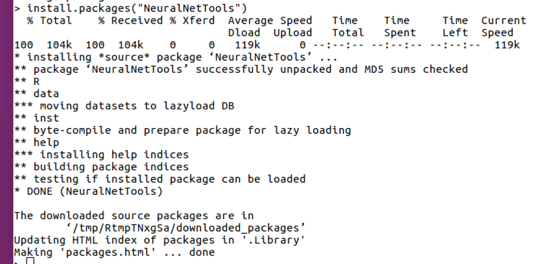

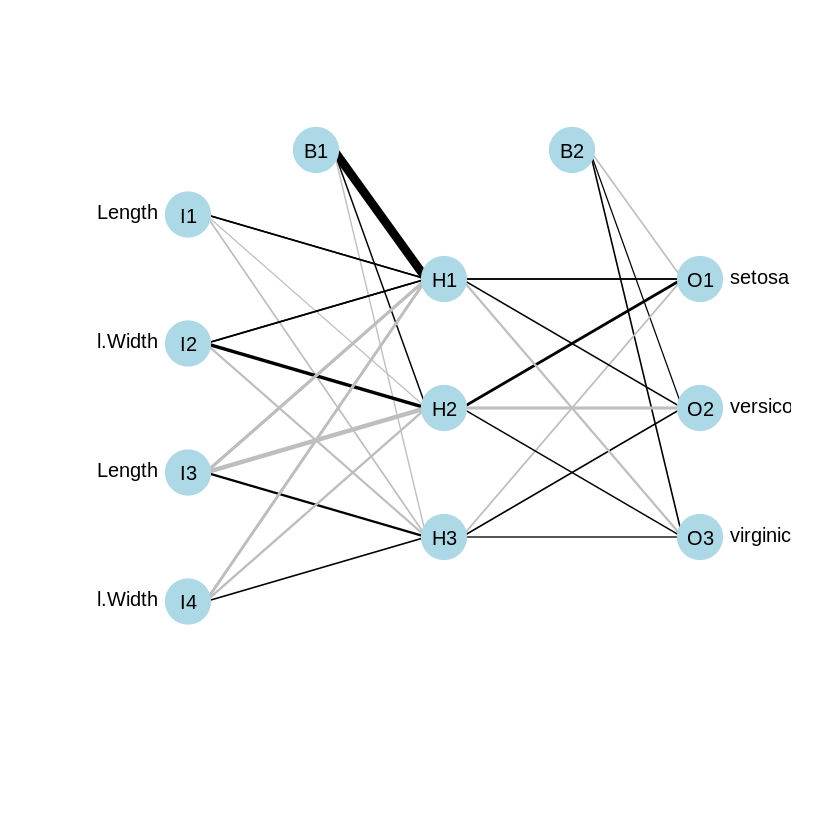

In [6]:
#可視化
library(NeuralNetTools)
plotnet(iris.nn.train)